In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('Traffic_Collision_Data_from_2010_to_Present.csv', delimiter=',')

In [7]:
# Location, Date reported, date occurred, area name, premise desc

# Victim age, sex, descent for biased analysis

In [15]:
str_coord = []
for i in range(len(df['Location'])):
    temp_str = df['Location'][i].replace('(', '').replace(')', '').replace(',', '').split(' ')
    temp_coord = [float(x) for x in temp_str]
    str_coord.append(temp_coord)
lon = [x[0] for x in str_coord]
lat = [x[1] for x in str_coord]

In [21]:
f = {'longitude':lon, 'latitude':lat}
data = pd.DataFrame(f)

In [ ]:
x = data['longitude'].unique()

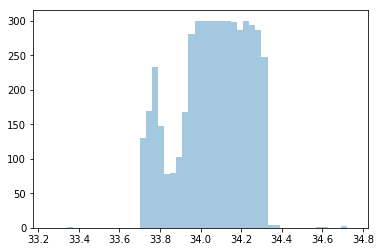

In [34]:
import seaborn as sns
sns.distplot(x, kde=False, hist=True, hist_kws={"range": [33.25,34.75]})